In [1]:
import sys
import os

sys.path.insert(0, os.path.join("..", ".."))
import random
import time

import sklearn
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import pandas as pd

import Data
from signature_mahalanobis_knn import SignatureMahalanobisKNN
from signature_mahalanobis_knn.utils import compute_auc_given_dists
import UCR_data_support

In [2]:
DATA_DIR = "/Users/zoos/PycharmProjects/Anomaly_detection/data/"
# importlib.reload(Data)
# importlib.reload(SigMahaKNN)

In [3]:
seed = 1

### Pen digit data example; Reproduce the result.

In [4]:
n_neighbours = 100

In [5]:
# data = Data.Data(n_samples=(800, 30, 30), if_sample=True)
data = Data.Data(if_sample=False, random_seed=seed)
data.load_pen_digit()

depths = [1, 2, 3, 4, 5]
digits = range(10)

doing digit 0 doing signature level  1
len(data.corpus) 780
len(data.test_inlier) 363
len(data.test_outlier) 3135
fit_time: 10.063539028167725
compute_auc_time: 9.991588115692139
depth:  1 , Auc of  digit:  0  is  0.9236207222288126
doing digit 1 doing signature level  1
len(data.corpus) 779
len(data.test_inlier) 364
len(data.test_outlier) 3134
fit_time: 1.3015568256378174


/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:261: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator


compute_auc_time: 6.059915065765381
depth:  1 , Auc of  digit:  1  is  0.8300113256239612
doing digit 2 doing signature level  1
len(data.corpus) 780
len(data.test_inlier) 364
len(data.test_outlier) 3134
fit_time: 1.3631317615509033


/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:261: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator


compute_auc_time: 6.2524518966674805
depth:  1 , Auc of  digit:  2  is  0.9320072476980582
doing digit 3 doing signature level  1
len(data.corpus) 719
len(data.test_inlier) 336
len(data.test_outlier) 3162
fit_time: 1.3106367588043213
compute_auc_time: 5.999101161956787
depth:  1 , Auc of  digit:  3  is  0.922022303545074
doing digit 4 doing signature level  1
len(data.corpus) 780
len(data.test_inlier) 364
len(data.test_outlier) 3134
fit_time: 1.4209661483764648


/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:261: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator


compute_auc_time: 5.9232141971588135
depth:  1 , Auc of  digit:  4  is  0.9830396151391684
doing digit 5 doing signature level  1
len(data.corpus) 720
len(data.test_inlier) 335
len(data.test_outlier) 3163
fit_time: 1.2171669006347656


/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:261: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator


compute_auc_time: 5.923392057418823
depth:  1 , Auc of  digit:  5  is  0.9057290216637331
doing digit 6 doing signature level  1
len(data.corpus) 720
len(data.test_inlier) 336
len(data.test_outlier) 3162
fit_time: 1.161789894104004


/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:261: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator


compute_auc_time: 5.955906867980957
depth:  1 , Auc of  digit:  6  is  0.8962102986355833
doing digit 7 doing signature level  1
len(data.corpus) 778
len(data.test_inlier) 364
len(data.test_outlier) 3134
fit_time: 1.4109997749328613
compute_auc_time: 5.941327095031738
depth:  1 , Auc of  digit:  7  is  0.8957924255068479
doing digit 8 doing signature level  1
len(data.corpus) 719
len(data.test_inlier) 336
len(data.test_outlier) 3162
fit_time: 1.2382440567016602
compute_auc_time: 5.920679092407227
depth:  1 , Auc of  digit:  8  is  0.9399820412035783
doing digit 9 doing signature level  1
len(data.corpus) 719
len(data.test_inlier) 336
len(data.test_outlier) 3162
fit_time: 1.2690927982330322
compute_auc_time: 5.920597791671753
depth:  1 , Auc of  digit:  9  is  0.8178161049365983


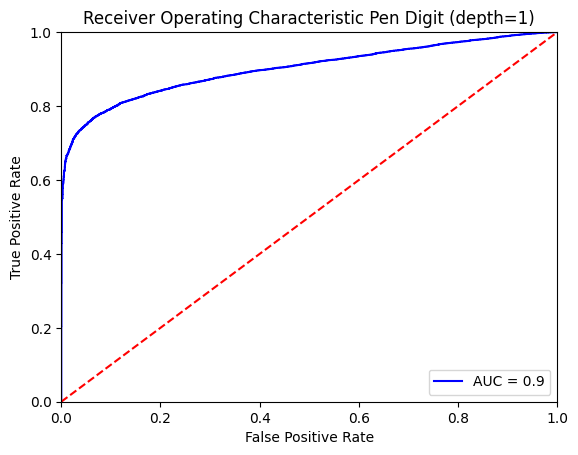

Overall,  depth:  1 AUC:  0.9011941225982674
doing digit 0 doing signature level  2
len(data.corpus) 780
len(data.test_inlier) 363
len(data.test_outlier) 3135
fit_time: 1.308121681213379
compute_auc_time: 6.258044958114624
depth:  2 , Auc of  digit:  0  is  0.9994156440437432
doing digit 1 doing signature level  2
len(data.corpus) 779
len(data.test_inlier) 364
len(data.test_outlier) 3134
fit_time: 1.3163371086120605
compute_auc_time: 6.049156904220581
depth:  2 , Auc of  digit:  1  is  0.882206498032918
doing digit 2 doing signature level  2
len(data.corpus) 780
len(data.test_inlier) 364
len(data.test_outlier) 3134
fit_time: 1.311708927154541
compute_auc_time: 6.092707872390747
depth:  2 , Auc of  digit:  2  is  0.9511227445177669
doing digit 3 doing signature level  2
len(data.corpus) 719
len(data.test_inlier) 336
len(data.test_outlier) 3162
fit_time: 1.1984961032867432
compute_auc_time: 6.022700786590576
depth:  2 , Auc of  digit:  3  is  0.9886656275413391
doing digit 4 doing signat

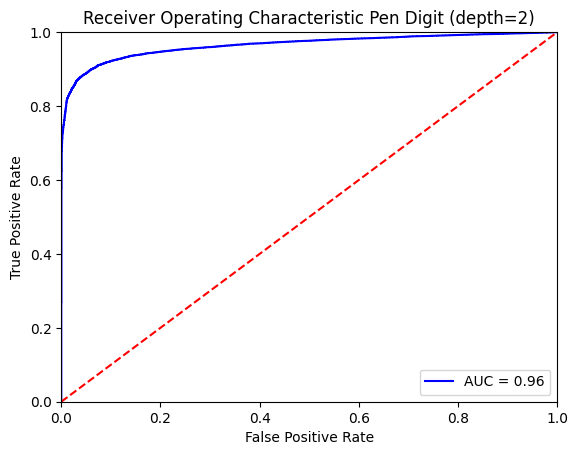

Overall,  depth:  2 AUC:  0.964656389818477
doing digit 0 doing signature level  3
len(data.corpus) 780
len(data.test_inlier) 363
len(data.test_outlier) 3135
fit_time: 1.342965841293335
compute_auc_time: 6.445879936218262
depth:  3 , Auc of  digit:  0  is  0.9978321712119015
doing digit 1 doing signature level  3
len(data.corpus) 779
len(data.test_inlier) 364
len(data.test_outlier) 3134
fit_time: 1.4032697677612305
compute_auc_time: 6.378614664077759
depth:  3 , Auc of  digit:  1  is  0.970122092330133
doing digit 2 doing signature level  3
len(data.corpus) 780
len(data.test_inlier) 364
len(data.test_outlier) 3134
fit_time: 1.4213371276855469
compute_auc_time: 6.583529949188232
depth:  3 , Auc of  digit:  2  is  0.9907229815494015
doing digit 3 doing signature level  3
len(data.corpus) 719
len(data.test_inlier) 336
len(data.test_outlier) 3162
fit_time: 1.3599779605865479
compute_auc_time: 6.415704965591431
depth:  3 , Auc of  digit:  3  is  0.9952787566639559
doing digit 4 doing signat

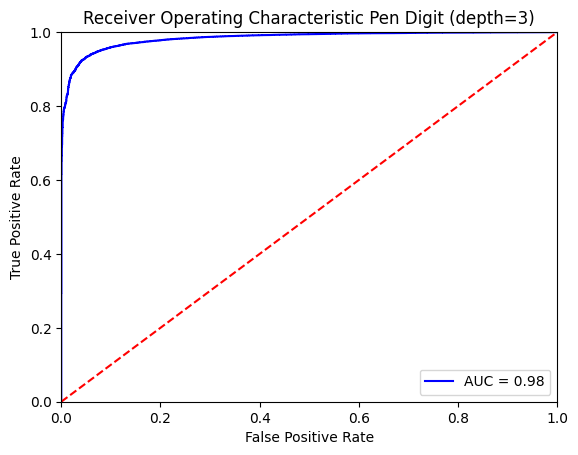

Overall,  depth:  3 AUC:  0.9833291162703119
doing digit 0 doing signature level  4
len(data.corpus) 780
len(data.test_inlier) 363
len(data.test_outlier) 3135
fit_time: 1.4814271926879883
compute_auc_time: 6.84686803817749
depth:  4 , Auc of  digit:  0  is  0.9949666301993401
doing digit 1 doing signature level  4
len(data.corpus) 779
len(data.test_inlier) 364
len(data.test_outlier) 3134
fit_time: 1.472062110900879
compute_auc_time: 6.747668981552124
depth:  4 , Auc of  digit:  1  is  0.9852398718065597
doing digit 2 doing signature level  4
len(data.corpus) 780
len(data.test_inlier) 364
len(data.test_outlier) 3134
fit_time: 1.555401086807251
compute_auc_time: 6.726560831069946
depth:  4 , Auc of  digit:  2  is  0.9894510403444672
doing digit 3 doing signature level  4
len(data.corpus) 719
len(data.test_inlier) 336
len(data.test_outlier) 3162
fit_time: 1.5977261066436768
compute_auc_time: 6.752060890197754
depth:  4 , Auc of  digit:  3  is  0.9959752718291617
doing digit 4 doing signat

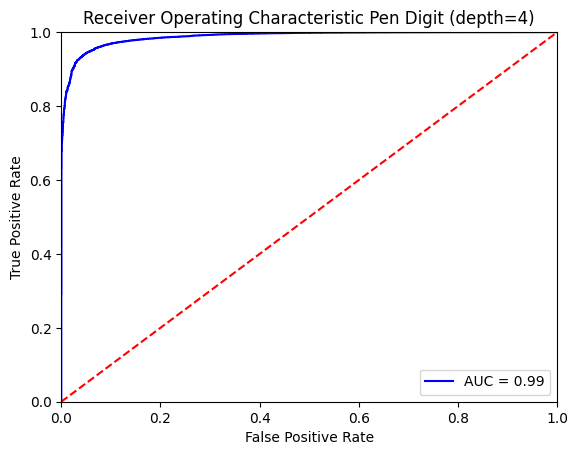

Overall,  depth:  4 AUC:  0.9873373465898034
doing digit 0 doing signature level  5
len(data.corpus) 780
len(data.test_inlier) 363
len(data.test_outlier) 3135
fit_time: 1.8557980060577393
compute_auc_time: 15.691333770751953
depth:  5 , Auc of  digit:  0  is  0.9947574922781535
doing digit 1 doing signature level  5
len(data.corpus) 779
len(data.test_inlier) 364
len(data.test_outlier) 3134
fit_time: 1.6090118885040283
compute_auc_time: 14.628620147705078
depth:  5 , Auc of  digit:  1  is  0.9900453726235474
doing digit 2 doing signature level  5
len(data.corpus) 780
len(data.test_inlier) 364
len(data.test_outlier) 3134
fit_time: 2.0345211029052734
compute_auc_time: 11.240407943725586
depth:  5 , Auc of  digit:  2  is  0.9912226414300441
doing digit 3 doing signature level  5
len(data.corpus) 719
len(data.test_inlier) 336
len(data.test_outlier) 3162
fit_time: 1.4860689640045166
compute_auc_time: 14.095582962036133
depth:  5 , Auc of  digit:  3  is  0.9964675386283546
doing digit 4 doing

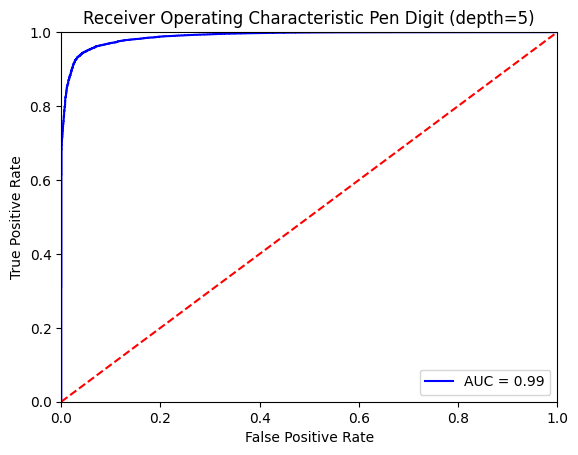

Overall,  depth:  5 AUC:  0.9887056355253816
CPU times: user 14min 11s, sys: 3min 49s, total: 18min
Wall time: 8min


In [6]:
%%time
depth_to_auc = {}

for depth in depths:
    digit_to_inlier_dists = {}
    digit_to_outlier_dists = {}

    for digit in digits:
        data.load_pen_digit(digit=digit)
        print("doing digit", digit, "doing signature level ", depth)
        print("len(data.corpus)", len(data.corpus))
        print("len(data.test_inlier)", len(data.test_inlier))
        print("len(data.test_outlier)", len(data.test_outlier))
        signature_maha_knn = SignatureMahalanobisKNN(random_state=seed)
        # Measure the time spent on fit
        start_time = time.time()
        signature_maha_knn.fit(
            knn_library="pynndescent",
            X_train=data.corpus,
            signature_kwargs={
                "augmentation_list": None,
                "depth": depth,
            },
        )
        fit_time = time.time() - start_time
        print(f"fit_time: {fit_time}")

        # Measure the time spent on conformance
        start_time = time.time()
        inlier_dists = signature_maha_knn.conformance(
            data.test_inlier, n_neighbors=n_neighbours
        )
        outlier_dists = signature_maha_knn.conformance(
            data.test_outlier, n_neighbors=n_neighbours
        )
        compute_auc_time = time.time() - start_time
        print(f"compute_auc_time: {compute_auc_time}")

        digit_to_inlier_dists[digit] = inlier_dists
        digit_to_outlier_dists[digit] = outlier_dists

        auc = compute_auc_given_dists(inlier_dists, outlier_dists)
        print("depth: ", depth, ", Auc of", " digit: ", digit, " is ", auc)

    all_inlier_dists = np.concatenate(list(digit_to_inlier_dists.values()))
    all_outlier_dists = np.concatenate(list(digit_to_outlier_dists.values()))
    auc = compute_auc_given_dists(
        all_inlier_dists,
        all_outlier_dists,
        plot=True,
        title=f"Pen Digit (depth={depth})",
    )
    print("Overall, ", "depth: ", depth, "AUC: ", auc)
    depth_to_auc[depth] = auc

In [7]:
print(depth_to_auc)

{1: 0.9011941225982674, 2: 0.964656389818477, 3: 0.9833291162703119, 4: 0.9873373465898034, 5: 0.9887056355253816}


## Can we reproduce distances?

For depth 2, digit 0, no augmentation_list:

In [8]:
data = Data.Data(n_samples=(800, 30, 30), if_sample=True)
data.load_pen_digit()

In [9]:
digit = 0
depth = 2
data.load_pen_digit(digit=digit)
print("doing digit", digit, "doing signature level ", depth)
signature_maha_knn = SignatureMahalanobisKNN()
# Measure the time spent on fit
start_time = time.time()
signature_maha_knn.fit(
    knn_library="sklearn",
    X_train=data.corpus,
    signature_kwargs={},
)
fit_time = time.time() - start_time
print(f"fit_time: {fit_time}")

inlier_dists = signature_maha_knn.conformance(
    data.test_inlier, n_neighbors=n_neighbours
)
outlier_dists = signature_maha_knn.conformance(
    data.test_outlier, n_neighbors=n_neighbours
)

doing digit 0 doing signature level  2
fit_time: 1.716937780380249


#### Inlier dists

In [10]:
inlier_dists

array([0.02203349, 0.02636506, 0.01619603, 0.01555797, 0.11322956,
       0.03182318, 0.02529738, 0.09760276, 0.01769069, 0.0184093 ,
       0.03047298, 0.01305365, 0.02557788, 0.07339484, 0.01822537,
       0.07480418, 0.02407774, 0.17452867, 0.03732281, 0.10320762,
       0.01851509, 0.01398619, 0.01354816, 0.01247237, 0.02372335,
       0.01140402, 0.02230901, 0.04476067, 0.0622557 , 0.02477818])

#### Should be 
array([[0.00048547],
       [0.00069512],
       [0.00026231],
       [0.00024205],
       [0.01478617],
       [0.00101271],
       [0.00063996],
       [0.01085489],
       [0.00031296],
       [0.0003389 ],
       [0.0009286 ],
       [0.0001704 ],
       [0.00065423],
       [0.0053868 ],
       [0.00033216],
       [0.00559567],
       [0.00057974],
       [0.03442473],
       [0.00139299],
       [0.01456522],
       [0.00034281],
       [0.00019561],
       [0.00018355],
       [0.00015556],
       [0.0005628 ],
       [0.00013005],
       [0.00049769],
       [0.00200352],
       [0.00387577],
       [0.00061396]])

In [11]:
previous_output = np.array(
    [
        [0.00048547],
        [0.00069512],
        [0.00026231],
        [0.00024205],
        [0.01478617],
        [0.00101271],
        [0.00063996],
        [0.01085489],
        [0.00031296],
        [0.0003389],
        [0.0009286],
        [0.0001704],
        [0.00065423],
        [0.0053868],
        [0.00033216],
        [0.00559567],
        [0.00057974],
        [0.03442473],
        [0.00139299],
        [0.01456522],
        [0.00034281],
        [0.00019561],
        [0.00018355],
        [0.00015556],
        [0.0005628],
        [0.00013005],
        [0.00049769],
        [0.00200352],
        [0.00387577],
        [0.00061396],
    ]
)

In [12]:
np.sqrt(previous_output).reshape(30)

array([0.02203338, 0.02636513, 0.01619599, 0.01555796, 0.1215984 ,
       0.0318231 , 0.02529743, 0.1041868 , 0.01769068, 0.01840924,
       0.03047294, 0.01305374, 0.02557792, 0.07339482, 0.01822526,
       0.07480421, 0.02407779, 0.18553903, 0.03732278, 0.12068645,
       0.01851513, 0.01398606, 0.01354806, 0.01247237, 0.02372341,
       0.01140395, 0.02230897, 0.0447607 , 0.06225568, 0.02477822])

square root the expected distance array and compare to what we get:

In [13]:
np.sqrt(previous_output).reshape(30) - inlier_dists

array([-1.02698604e-07,  7.06201024e-08, -4.48023166e-08, -1.52162402e-08,
        8.36883323e-03, -7.46429760e-08,  5.43689659e-08,  6.58404394e-03,
       -1.29966361e-08, -6.40953989e-08, -3.90337506e-08,  8.24570676e-08,
        4.13584945e-08, -1.25793449e-08, -1.17102862e-07,  2.81579632e-08,
        4.75885919e-08,  1.10103507e-02, -3.11002757e-08,  1.74788333e-02,
        3.86669326e-08, -1.21665173e-07, -1.00438225e-07,  3.97413871e-09,
        5.21471378e-08, -6.93480474e-08, -4.72183132e-08,  2.90194190e-08,
       -2.10565009e-08,  4.07364884e-08])

In [14]:
previous_output.reshape(30) - (inlier_dists**2)

array([-4.52560604e-09,  3.72381116e-09, -1.45123750e-09, -4.73467427e-10,
        1.96523603e-03, -4.75074807e-09,  2.75078734e-09,  1.32859135e-03,
       -4.59838713e-10, -2.35989886e-09, -2.37894771e-09,  2.15273864e-09,
        2.11572683e-09, -1.84651773e-09, -4.26847328e-09,  4.21266765e-09,
        2.29165403e-09,  3.96447167e-03, -2.32149854e-09,  3.91340718e-03,
        1.43184499e-09, -3.40324873e-09, -2.72149679e-09,  9.91338369e-11,
        2.47421274e-09, -1.58168768e-09, -2.10678580e-09,  2.59785800e-09,
       -2.62177412e-09,  2.01875338e-09])

In [15]:
inlier_dists**2

array([0.00048547, 0.00069512, 0.00026231, 0.00024205, 0.01282093,
       0.00101271, 0.00063996, 0.0095263 , 0.00031296, 0.0003389 ,
       0.0009286 , 0.0001704 , 0.00065423, 0.0053868 , 0.00033216,
       0.00559567, 0.00057974, 0.03046026, 0.00139299, 0.01065181,
       0.00034281, 0.00019561, 0.00018355, 0.00015556, 0.0005628 ,
       0.00013005, 0.00049769, 0.00200352, 0.00387577, 0.00061396])

#### Outlier dists

In [16]:
outlier_dists

array([0.67234357, 0.24378294, 0.12239674, 0.2594328 , 0.24765937,
       0.12541939, 0.21369961, 0.20740823, 0.70915457, 0.71401431,
       0.23341582, 0.55010934, 0.18330298, 0.28309617, 0.24274554,
       0.27733141, 0.74215369, 0.43625734, 0.62571779, 0.26774461,
       0.22821211, 0.70655548, 0.45673413, 0.43718576, 0.09406633,
       0.17178055, 0.2021866 , 0.50789138, 0.46324354, 0.2810891 ])

#### Should be
array([[0.51469102],
       [0.05943012],
       [0.01498096],
       [0.06730538],
       [0.06133516],
       [0.01573002],
       [0.04566752],
       [0.04301818],
       [0.5029002 ],
       [0.56088974],
       [0.05448295],
       [0.39831413],
       [0.03359998],
       [0.08014344],
       [0.05892539],
       [0.07691271],
       [0.67933435],
       [0.20881273],
       [0.42321369],
       [0.07168717],
       [0.05208077],
       [0.51004513],
       [0.29315337],
       [0.21727576],
       [0.00884847],
       [0.02950856],
       [0.04087942],
       [0.33563053],
       [0.26939553],
       [0.07901108]])

square root the expected distance array and compare to what we get:

In [17]:
previous_output = np.array(
    [
        [0.51469102],
        [0.05943012],
        [0.01498096],
        [0.06730538],
        [0.06133516],
        [0.01573002],
        [0.04566752],
        [0.04301818],
        [0.5029002],
        [0.56088974],
        [0.05448295],
        [0.39831413],
        [0.03359998],
        [0.08014344],
        [0.05892539],
        [0.07691271],
        [0.67933435],
        [0.20881273],
        [0.42321369],
        [0.07168717],
        [0.05208077],
        [0.51004513],
        [0.29315337],
        [0.21727576],
        [0.00884847],
        [0.02950856],
        [0.04087942],
        [0.33563053],
        [0.26939553],
        [0.07901108],
    ]
)

In [18]:
np.sqrt(previous_output).reshape(30)

array([0.7174197 , 0.24378294, 0.12239673, 0.2594328 , 0.24765936,
       0.12541938, 0.2136996 , 0.20740824, 0.70915457, 0.74892572,
       0.23341583, 0.63112133, 0.18330297, 0.28309617, 0.24274553,
       0.27733141, 0.82421742, 0.45696032, 0.65054876, 0.2677446 ,
       0.22821212, 0.71417444, 0.5414364 , 0.46612848, 0.09406631,
       0.17178056, 0.2021866 , 0.57933628, 0.51903326, 0.2810891 ])

In [19]:
np.sqrt(previous_output).reshape(30) - outlier_dists

array([ 4.50761275e-02, -6.08927639e-09, -7.72790068e-09, -5.17113019e-10,
       -9.18373180e-09, -9.48045786e-09, -4.75888406e-09,  1.14024833e-08,
        1.77743376e-10,  3.49114167e-02,  8.53382895e-09,  8.10119833e-02,
       -4.34167857e-09, -5.11723497e-10, -1.01032923e-08,  2.49688659e-10,
        8.20637253e-02,  2.07029803e-02,  2.48309681e-02, -8.65450989e-09,
        4.68641612e-09,  7.61895942e-03,  8.47022696e-02,  2.89427237e-02,
       -2.48877985e-08,  6.82265699e-09,  5.94662181e-10,  7.14449057e-02,
        5.57897246e-02, -7.37194078e-09])

In [20]:
previous_output.reshape(30) - (outlier_dists**2)

array([ 6.26451461e-02, -2.96892338e-09, -1.89173964e-09, -2.68312150e-10,
       -4.54887442e-09, -2.37806632e-09, -2.03394328e-09,  4.72993795e-09,
        2.52095012e-10,  5.10733090e-02,  3.98386147e-09,  9.56938395e-02,
       -1.59168519e-09, -2.89733917e-10, -4.90505807e-09,  1.38493023e-10,
        1.28542248e-01,  1.84922675e-02,  3.16909341e-02, -4.63439662e-09,
        2.13899385e-09,  1.08244836e-02,  8.45473085e-02,  2.61443743e-02,
       -4.68220719e-09,  2.34399960e-09,  2.40465446e-10,  7.76768778e-02,
        5.48009524e-02, -4.14434438e-09])

In [21]:
outlier_dists**2

array([0.45204587, 0.05943012, 0.01498096, 0.06730538, 0.06133516,
       0.01573002, 0.04566752, 0.04301818, 0.5029002 , 0.50981643,
       0.05448295, 0.30262029, 0.03359998, 0.08014344, 0.05892539,
       0.07691271, 0.5507921 , 0.19032046, 0.39152276, 0.07168717,
       0.05208077, 0.49922065, 0.20860606, 0.19113139, 0.00884847,
       0.02950856, 0.04087942, 0.25795365, 0.21459458, 0.07901108])

## Can we reproduce distances?

For depth 4, digit 0, with augmentation_list=None

In [22]:
digit = 0
depth = 4
data.load_pen_digit(digit=digit)
print("doing digit", digit, "doing signature level ", depth)
signature_maha_knn = SignatureMahalanobisKNN()
# Measure the time spent on fit
start_time = time.time()
signature_maha_knn.fit(
    knn_library="sklearn",
    X_train=data.corpus,
    signature_kwargs={
        "augmentation_list": None,
        "depth": depth,
    },
)
fit_time = time.time() - start_time
print(f"fit_time: {fit_time}")

inlier_dists = signature_maha_knn.conformance(
    data.test_inlier, n_neighbors=n_neighbours
)
outlier_dists = signature_maha_knn.conformance(
    data.test_outlier, n_neighbors=n_neighbours
)

doing digit 0 doing signature level  4
fit_time: 1.2553520202636719


#### Inlier dists

In [23]:
inlier_dists

array([0.03967367, 0.05504537, 0.03504562, 0.02803288, 0.79020931,
       0.09154714, 0.03940437, 0.60588313, 0.05382932, 0.0664232 ,
       0.07546581, 0.04712501, 0.05999963, 0.27495292, 0.04513797,
       0.39363584, 0.08103539, 1.12660827, 0.13128929, 0.72245765,
       0.06584397, 0.0319688 , 0.02719407, 0.06510798, 0.05253445,
       0.03191909, 0.04620362, 0.10642687, 0.21951508, 0.04757213])

#### Should be 
array([[1.57399406e-03],
       [3.02998419e-03],
       [1.22819305e-03],
       [7.85843469e-04],
       [6.24430478e-01],
       [8.38084612e-03],
       [1.55270391e-03],
       [3.67094040e-01],
       [2.89758784e-03],
       [4.41202335e-03],
       [5.69510600e-03],
       [2.22076988e-03],
       [3.59995430e-03],
       [7.55992085e-02],
       [2.03744438e-03],
       [1.54949293e-01],
       [6.56671124e-03],
       [1.26924562e+00],
       [1.72368567e-02],
       [5.21945238e-01],
       [4.33543418e-03],
       [1.02200045e-03],
       [7.39515584e-04],
       [4.23905114e-03],
       [2.75986036e-03],
       [1.01882860e-03],
       [2.13477737e-03],
       [1.13266921e-02],
       [4.81867641e-02],
       [2.26310734e-03]])

In [24]:
previous_output = np.array(
    [
        [1.57399406e-03],
        [3.02998419e-03],
        [1.22819305e-03],
        [7.85843469e-04],
        [6.24430478e-01],
        [8.38084612e-03],
        [1.55270391e-03],
        [3.67094040e-01],
        [2.89758784e-03],
        [4.41202335e-03],
        [5.69510600e-03],
        [2.22076988e-03],
        [3.59995430e-03],
        [7.55992085e-02],
        [2.03744438e-03],
        [1.54949293e-01],
        [6.56671124e-03],
        [1.26924562e00],
        [1.72368567e-02],
        [5.21945238e-01],
        [4.33543418e-03],
        [1.02200045e-03],
        [7.39515584e-04],
        [4.23905114e-03],
        [2.75986036e-03],
        [1.01882860e-03],
        [2.13477737e-03],
        [1.13266921e-02],
        [4.81867641e-02],
        [2.26310734e-03],
    ]
)

In [25]:
np.sqrt(previous_output).reshape(30)

array([0.03967359, 0.05504529, 0.03504559, 0.0280329 , 0.79020914,
       0.09154696, 0.03940436, 0.60588286, 0.05382925, 0.06642306,
       0.07546593, 0.04712505, 0.05999962, 0.2749531 , 0.04513806,
       0.39363599, 0.08103525, 1.12660802, 0.13128921, 0.72245778,
       0.06584401, 0.03196874, 0.02719404, 0.065108  , 0.05253437,
       0.03191909, 0.04620365, 0.10642693, 0.21951484, 0.04757213])

square root the expected distance array and compare to what we get:

In [26]:
np.sqrt(previous_output).reshape(30) - inlier_dists

array([-7.68822677e-08, -7.29154133e-08, -3.01010823e-08,  2.25582237e-08,
       -1.75527447e-07, -1.74475403e-07, -1.03651831e-08, -2.69768624e-07,
       -7.08082831e-08, -1.33603602e-07,  1.14141816e-07,  3.97771448e-08,
       -1.01507058e-08,  1.83509061e-07,  8.58520603e-08,  1.46178658e-07,
       -1.38500575e-07, -2.50542729e-07, -7.64500813e-08,  1.26416519e-07,
        4.15011214e-08, -5.37298039e-08, -3.83827406e-08,  1.13304001e-08,
       -7.41194778e-08,  2.26507350e-09,  3.39079999e-08,  6.54568523e-08,
       -2.45914014e-07, -4.55573797e-09])

In [27]:
previous_output.reshape(30) - (inlier_dists**2)

array([-6.10039766e-09, -8.02730577e-09, -2.10982100e-09,  1.26474434e-09,
       -2.77406814e-07, -3.19454164e-08, -8.16867004e-10, -3.26896443e-07,
       -7.62311814e-09, -1.77487390e-08,  1.72276227e-08,  3.74899791e-09,
       -1.21807706e-09,  1.00912738e-07,  7.75038337e-09,  1.15082340e-07,
       -2.24468758e-08, -5.64526956e-07, -2.00741474e-08,  1.82661179e-07,
        5.46519911e-09, -3.43535134e-09, -2.08756472e-09,  1.47539916e-09,
       -7.78764610e-09,  1.44598185e-10,  3.13334564e-09,  1.39327398e-08,
       -1.07963610e-07, -4.33452318e-10])

In [28]:
inlier_dists**2

array([1.57400016e-03, 3.02999222e-03, 1.22819516e-03, 7.85842204e-04,
       6.24430755e-01, 8.38087807e-03, 1.55270473e-03, 3.67094367e-01,
       2.89759546e-03, 4.41204110e-03, 5.69508877e-03, 2.22076613e-03,
       3.59995552e-03, 7.55991076e-02, 2.03743663e-03, 1.54949178e-01,
       6.56673369e-03, 1.26924618e+00, 1.72368768e-02, 5.21945055e-01,
       4.33542871e-03, 1.02200389e-03, 7.39517672e-04, 4.23904966e-03,
       2.75986815e-03, 1.01882846e-03, 2.13477424e-03, 1.13266782e-02,
       4.81868721e-02, 2.26310777e-03])

#### Outlier dists

In [29]:
outlier_dists

array([15.68734774,  2.88892802,  0.55714101,  1.50823125,  1.5675811 ,
        1.00905713,  2.91069471,  2.05114721, 18.6500535 , 17.46589804,
        2.31507787, 11.18594221,  2.08877256,  3.5896572 ,  2.07437671,
        1.70494233, 16.20276287, 11.34922168, 14.22447212,  1.79131614,
        1.72692897, 17.4224665 , 10.45685905, 11.10301968,  0.40264396,
        1.66121212,  2.47344445,  8.79436824, 10.39406515,  3.76990887])

#### Should be
array([[2.46092896e+02],
       [8.34590435e+00],
       [3.10406297e-01],
       [2.27476239e+00],
       [2.45730543e+00],
       [1.01819646e+00],
       [8.47214222e+00],
       [4.20720434e+00],
       [3.47824524e+02],
       [3.05057648e+02],
       [5.35958481e+00],
       [1.25125313e+02],
       [4.36297131e+00],
       [1.28856373e+01],
       [4.30303574e+00],
       [2.90682650e+00],
       [2.62529602e+02],
       [1.28804825e+02],
       [2.02335602e+02],
       [3.20881152e+00],
       [2.98228765e+00],
       [3.03542328e+02],
       [1.09345932e+02],
       [1.23277054e+02],
       [1.62122369e-01],
       [2.75962615e+00],
       [6.11792469e+00],
       [7.73409119e+01],
       [1.08036621e+02],
       [1.42122135e+01]])

square root the expected distance array and compare to what we get:

In [30]:
previous_output = np.array(
    [
        [2.46092896e02],
        [8.34590435e00],
        [3.10406297e-01],
        [2.27476239e00],
        [2.45730543e00],
        [1.01819646e00],
        [8.47214222e00],
        [4.20720434e00],
        [3.47824524e02],
        [3.05057648e02],
        [5.35958481e00],
        [1.25125313e02],
        [4.36297131e00],
        [1.28856373e01],
        [4.30303574e00],
        [2.90682650e00],
        [2.62529602e02],
        [1.28804825e02],
        [2.02335602e02],
        [3.20881152e00],
        [2.98228765e00],
        [3.03542328e02],
        [1.09345932e02],
        [1.23277054e02],
        [1.62122369e-01],
        [2.75962615e00],
        [6.11792469e00],
        [7.73409119e01],
        [1.08036621e02],
        [1.42122135e01],
    ]
)

In [31]:
np.sqrt(previous_output).reshape(30)

array([15.68734828,  2.88892789,  0.55714118,  1.50823154,  1.56757948,
        1.00905721,  2.91069446,  2.05114708, 18.65005426, 17.46589958,
        2.31507771, 11.18594265,  2.08877268,  3.58965699,  2.07437599,
        1.70494179, 16.20276526, 11.34922134, 14.22447194,  1.79131558,
        1.72693012, 17.42246619, 10.45686052, 11.10302004,  0.40264422,
        1.66121225,  2.47344389,  8.79436819, 10.39406662,  3.76990895])

In [32]:
np.sqrt(previous_output).reshape(30) - outlier_dists

array([ 5.42484775e-07, -1.29776750e-07,  1.75441668e-07,  2.94098708e-07,
       -1.62299082e-06,  8.76969586e-08, -2.51089855e-07, -1.30321758e-07,
        7.60598049e-07,  1.53263119e-06, -1.56555142e-07,  4.40688039e-07,
        1.22148594e-07, -2.11279730e-07, -7.22020625e-07, -5.40076410e-07,
        2.38531468e-06, -3.37048846e-07, -1.81282125e-07, -5.52109745e-07,
        1.15006647e-06, -3.10771561e-07,  1.47711321e-06,  3.62471932e-07,
        2.64911725e-07,  1.32784811e-07, -5.56680642e-07, -5.20487173e-08,
        1.47285028e-06,  8.01633524e-08])

In [33]:
previous_output.reshape(30) - (outlier_dists**2)

array([ 1.70202949e-05, -7.49831361e-07,  1.95491525e-07,  8.87137809e-07,
       -5.08833685e-06,  1.76982489e-07, -1.46169176e-06, -5.34618203e-07,
        2.83703892e-05,  5.35375625e-05, -7.24874663e-07,  9.85902207e-06,
        5.10281278e-07, -1.51684356e-06, -2.99548501e-06, -1.84159797e-06,
        7.72973819e-05, -7.65048404e-06, -5.15728505e-06, -1.97800588e-06,
        3.97216755e-06, -1.08288141e-05,  3.08919314e-05,  8.04906610e-06,
        2.13330280e-07,  4.41167494e-07, -2.75383698e-06, -9.15471176e-07,
        3.06178058e-05,  6.04417075e-07])

In [34]:
outlier_dists**2

array([2.46092879e+02, 8.34590510e+00, 3.10406102e-01, 2.27476150e+00,
       2.45731052e+00, 1.01819628e+00, 8.47214368e+00, 4.20720487e+00,
       3.47824496e+02, 3.05057594e+02, 5.35958553e+00, 1.25125303e+02,
       4.36297080e+00, 1.28856388e+01, 4.30303874e+00, 2.90682834e+00,
       2.62529525e+02, 1.28804833e+02, 2.02335607e+02, 3.20881350e+00,
       2.98228368e+00, 3.03542339e+02, 1.09345901e+02, 1.23277046e+02,
       1.62122156e-01, 2.75962571e+00, 6.11792744e+00, 7.73409128e+01,
       1.08036590e+02, 1.42122129e+01])

### Ship movement data example

In [35]:
# data = Data.Data(
#     n_samples=(800, 30, 30),
#     if_sample=True,
# )
data = Data.Data(
    if_sample=False,
)

Threshold distance:  4000
lead_lag:  True
inv_reset:  True
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 20.626681804656982


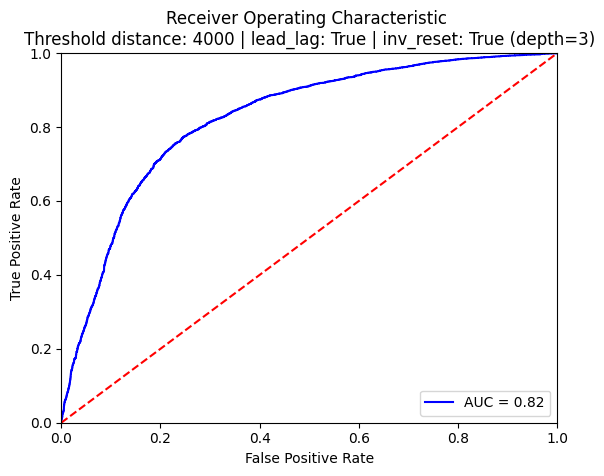

compute_auc_time: 335.9436459541321
lead_lag: True inv_rest: True thres_distance: 4000 auc: 0.8228045999999999
Threshold distance:  8000
lead_lag:  True
inv_reset:  True
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 23.2948579788208


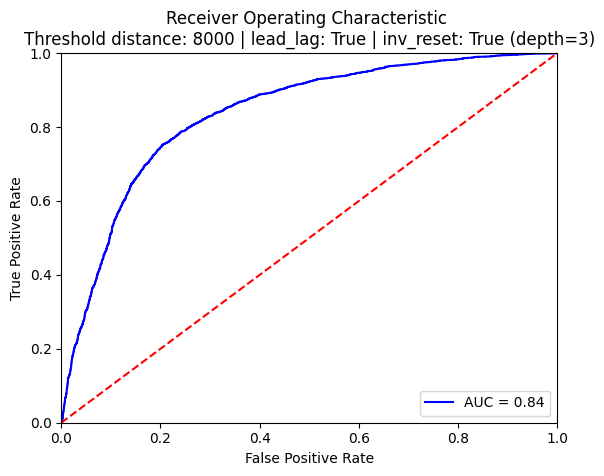

compute_auc_time: 338.6563048362732
lead_lag: True inv_rest: True thres_distance: 8000 auc: 0.8354452200000001
Threshold distance:  16000
lead_lag:  True
inv_reset:  True
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 27.60756516456604


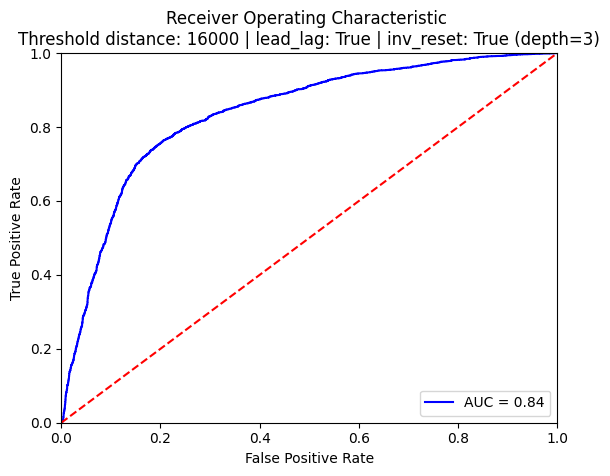

compute_auc_time: 293.8441872596741
lead_lag: True inv_rest: True thres_distance: 16000 auc: 0.8360074
Threshold distance:  32000
lead_lag:  True
inv_reset:  True
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 24.40476894378662


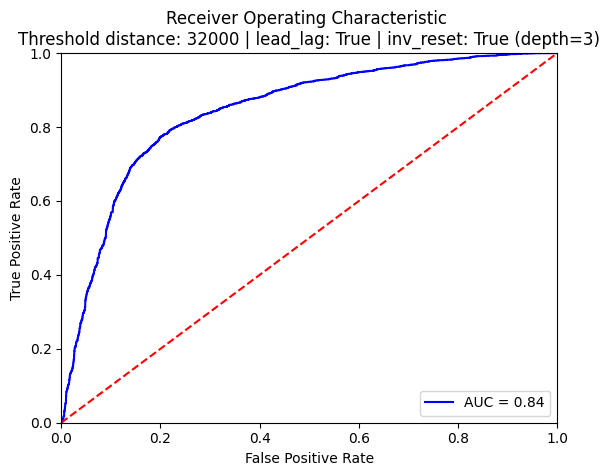

compute_auc_time: 317.9939298629761
lead_lag: True inv_rest: True thres_distance: 32000 auc: 0.84355992
Threshold distance:  4000
lead_lag:  True
inv_reset:  False
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 17.984686136245728


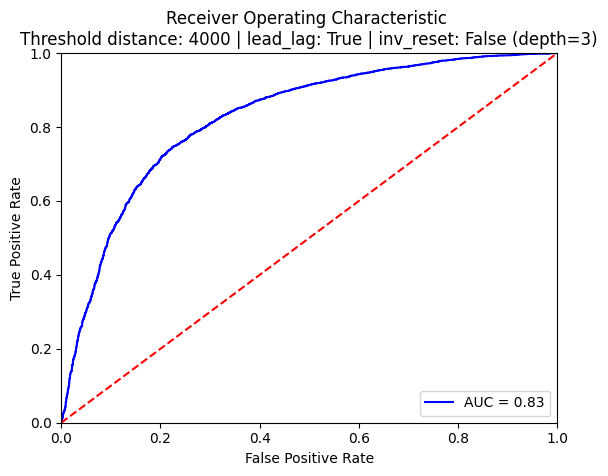

compute_auc_time: 182.08021187782288
lead_lag: True inv_rest: False thres_distance: 4000 auc: 0.8257225199999999
Threshold distance:  8000
lead_lag:  True
inv_reset:  False
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 17.325438022613525


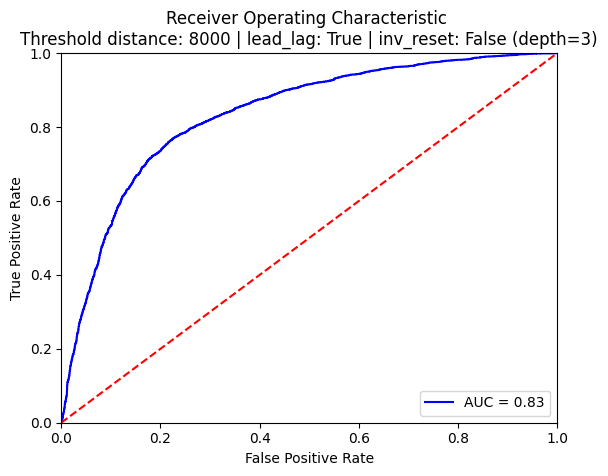

compute_auc_time: 207.74922394752502
lead_lag: True inv_rest: False thres_distance: 8000 auc: 0.8343324400000001
Threshold distance:  16000
lead_lag:  True
inv_reset:  False
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 15.623968124389648


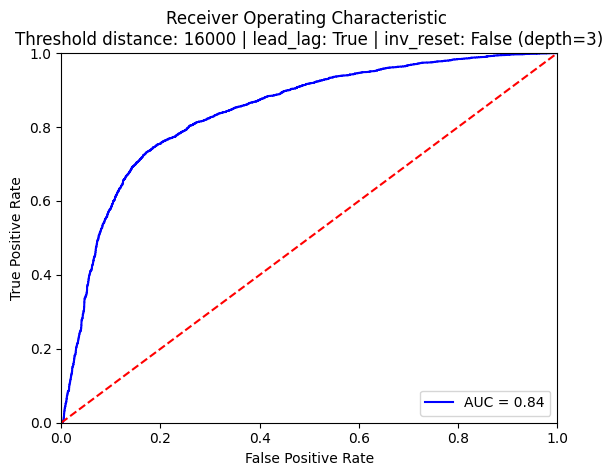

compute_auc_time: 234.3586070537567
lead_lag: True inv_rest: False thres_distance: 16000 auc: 0.84074052
Threshold distance:  32000
lead_lag:  True
inv_reset:  False
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 18.165555000305176


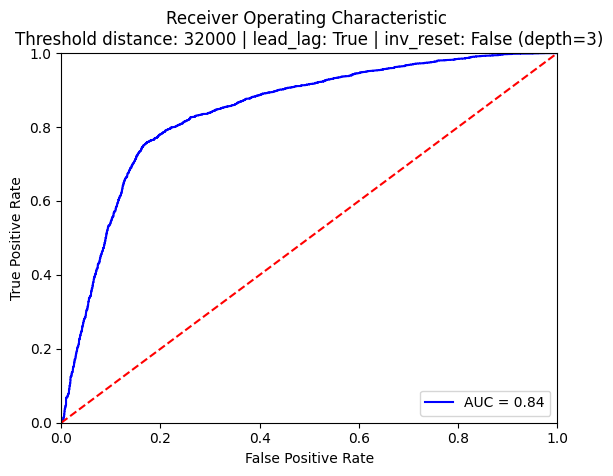

compute_auc_time: 252.45590329170227
lead_lag: True inv_rest: False thres_distance: 32000 auc: 0.8419482599999999
Threshold distance:  4000
lead_lag:  False
inv_reset:  True
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 12.57522201538086


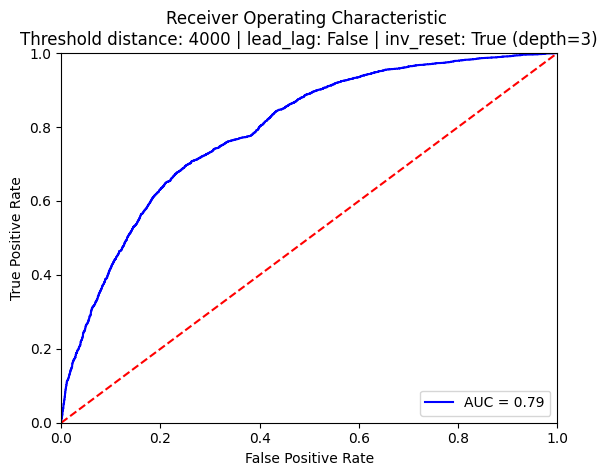

compute_auc_time: 31.587750911712646
lead_lag: False inv_rest: True thres_distance: 4000 auc: 0.79083568
Threshold distance:  8000
lead_lag:  False
inv_reset:  True
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 12.51298189163208


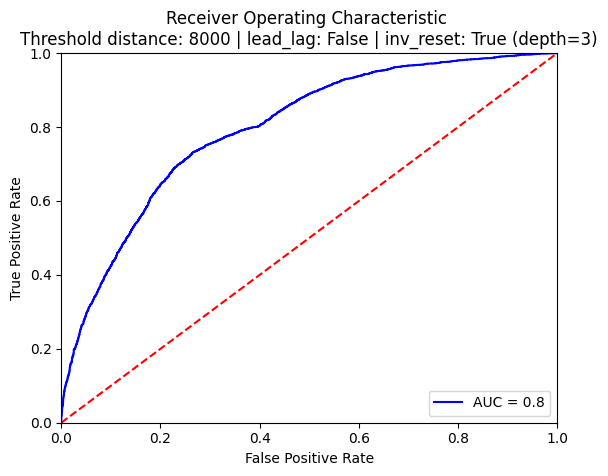

compute_auc_time: 33.34321594238281
lead_lag: False inv_rest: True thres_distance: 8000 auc: 0.7972313600000001
Threshold distance:  16000
lead_lag:  False
inv_reset:  True
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 12.596282005310059


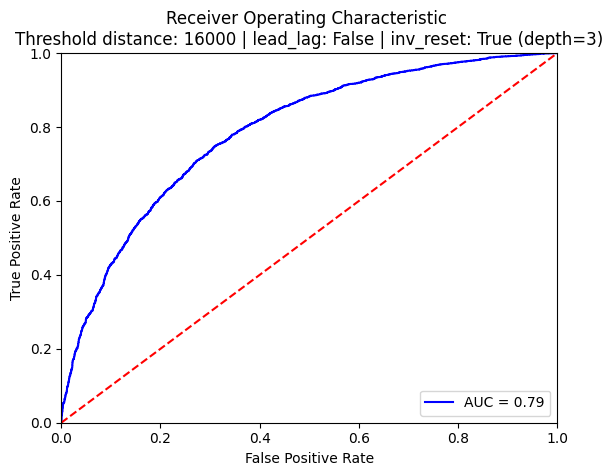

compute_auc_time: 32.92912983894348
lead_lag: False inv_rest: True thres_distance: 16000 auc: 0.7872241999999998
Threshold distance:  32000
lead_lag:  False
inv_reset:  True
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 13.208525896072388


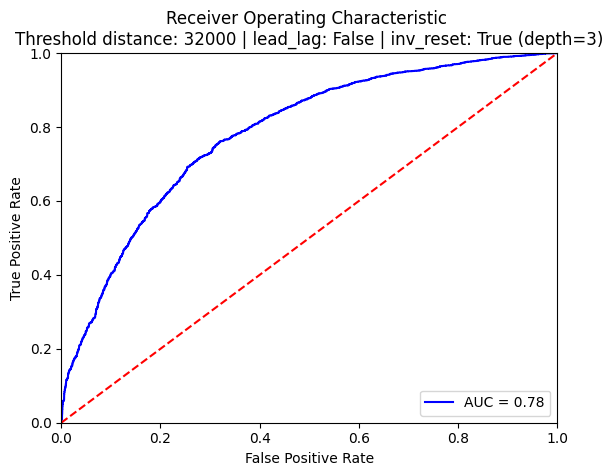

compute_auc_time: 33.75607681274414
lead_lag: False inv_rest: True thres_distance: 32000 auc: 0.78283072
Threshold distance:  4000
lead_lag:  False
inv_reset:  False
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 8.927592039108276


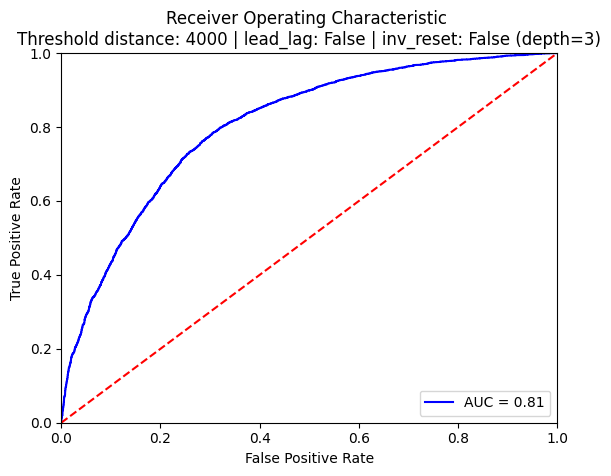

compute_auc_time: 17.88940119743347
lead_lag: False inv_rest: False thres_distance: 4000 auc: 0.80501948
Threshold distance:  8000
lead_lag:  False
inv_reset:  False
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 9.03955888748169


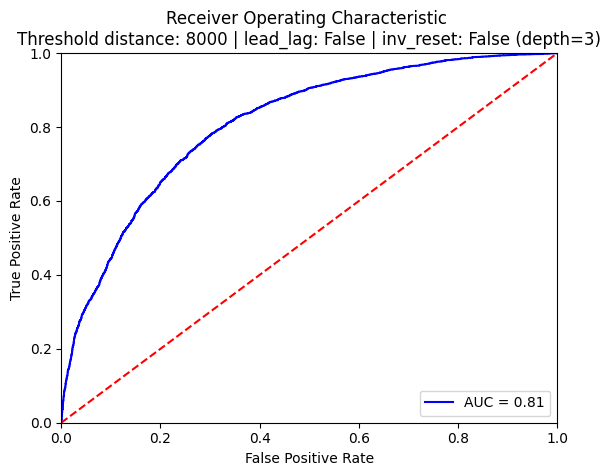

compute_auc_time: 18.115923166275024
lead_lag: False inv_rest: False thres_distance: 8000 auc: 0.80946924
Threshold distance:  16000
lead_lag:  False
inv_reset:  False
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 8.920457124710083


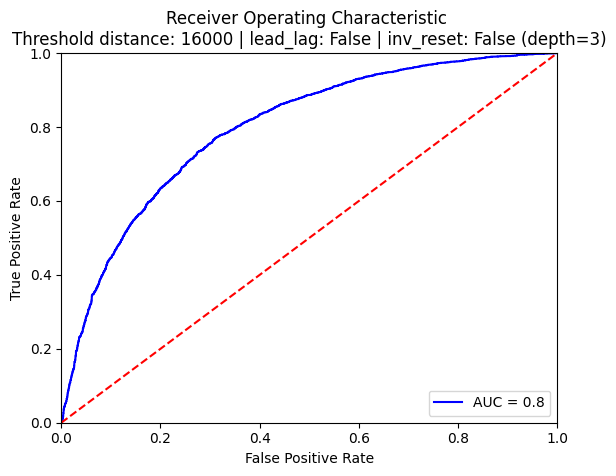

compute_auc_time: 18.476377248764038
lead_lag: False inv_rest: False thres_distance: 16000 auc: 0.79710896
Threshold distance:  32000
lead_lag:  False
inv_reset:  False
len(data.corpus) 5000
len(data.test_inlier) 5000
len(data.test_outlier) 5000
fit_time: 9.18234395980835


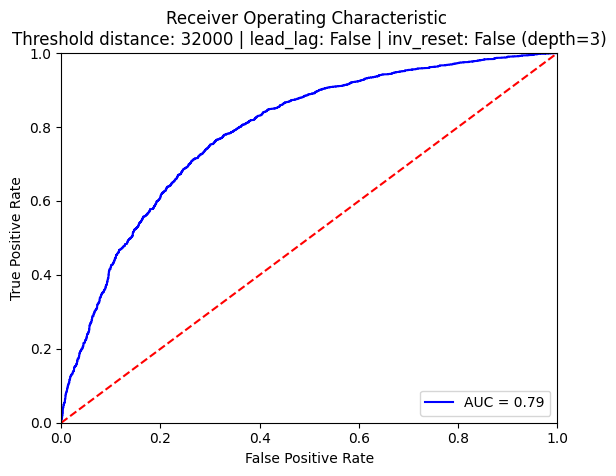

compute_auc_time: 19.352643966674805
lead_lag: False inv_rest: False thres_distance: 32000 auc: 0.78804452
CPU times: user 4h 43min 7s, sys: 10min 21s, total: 4h 53min 28s
Wall time: 47min 7s


In [36]:
%%time
lead_lag_and_inv_rest_and_thres_distance_to_auc = {}
depth = 3
for lead_lag in [True, False]:
    augmentation_list1 = []
    lead_lag_and_inv_rest_and_thres_distance_to_auc[lead_lag] = {}
    if lead_lag:
        augmentation_list1.append("leadlag")
    for inv_reset in [True, False]:
        lead_lag_and_inv_rest_and_thres_distance_to_auc[lead_lag][inv_reset] = {}
        if inv_reset:
            augmentation_list = augmentation_list1 + ["ir"]
        else:
            augmentation_list = augmentation_list1

        if (not inv_reset) and (not lead_lag):
            augmentation_list = None

        for thres_distance in [4000, 8000, 16000, 32000]:
            signature_maha_knn = SignatureMahalanobisKNN(random_state=seed)
            data.load_ship_movements(
                thres_distance=thres_distance,
            )
            print("Threshold distance: ", thres_distance)
            print("lead_lag: ", lead_lag)
            print("inv_reset: ", inv_reset)
            print("len(data.corpus)", len(data.corpus))
            print("len(data.test_inlier)", len(data.test_inlier))
            print("len(data.test_outlier)", len(data.test_outlier))

            # Measure the time spent on fit
            start_time = time.time()
            signature_maha_knn.fit(
                knn_library="pynndescent",
                X_train=data.corpus,
                signature_kwargs={
                    "augmentation_list": augmentation_list,
                    "depth": depth,
                },
            )
            fit_time = time.time() - start_time
            print(f"fit_time: {fit_time}")

            # Measure the time spent on compute_auc
            start_time = time.time()
            inlier_dists = signature_maha_knn.conformance(
                data.test_inlier, n_neighbors=n_neighbours
            )
            outlier_dists = signature_maha_knn.conformance(
                data.test_outlier, n_neighbors=n_neighbours
            )
            auc = compute_auc_given_dists(
                inlier_dists,
                outlier_dists,
                plot=True,
                title=f"\nThreshold distance: {thres_distance} | lead_lag: {lead_lag} | inv_reset: {inv_reset} (depth={depth})",
            )
            auc = compute_auc_given_dists(inlier_dists, outlier_dists)
            compute_auc_time = time.time() - start_time
            print(f"compute_auc_time: {compute_auc_time}")

            print(
                f"lead_lag: {lead_lag}",
                f"inv_rest: {inv_reset}",
                f"thres_distance: {thres_distance}",
                f"auc: {auc}",
            )

            lead_lag_and_inv_rest_and_thres_distance_to_auc[lead_lag][inv_reset][
                thres_distance
            ] = auc

### UCR data example

In [37]:
# data = Data.Data(if_sample=True, n_samples=[100, 10, 10])
data = Data.Data(if_sample=False)
data_full_names = [
    "Adiac",
    "ArrowHead",
    "Beef",
    "BeetleFly",
    "BirdChicken",
    "CBF",
    "ChlorineConcentration",
    "Coffee",
    "ECG200",
    "ECGFiveDays",
    "FaceFour",
    "GunPoint",
    "Ham",
    "Herring",
    "Lightning2",
    "Lightning7",
    "Meat",
    "MedicalImages",
    "MoteStrain",
    "Plane",
    "Strawberry",
    "Symbols",
    "ToeSegmentation1",
    "ToeSegmentation2",
    "Trace",
    "TwoLeadECG",
    "Wafer",
    "Wine",
]

In [38]:
n_neighbours = 10

In [39]:
%%time
depth = 5
signature_maha_knn = SignatureMahalanobisKNN(random_state=seed)

iter = 10
data_names = data_full_names

anomaly_level = 0.001
roughpathsbest, roughpathserror = UCR_data_support.compute_best_and_std(
    data_set=data_names,
    iter=iter,
    data=data,
    signature_maha_knn=signature_maha_knn,
    depth=depth,
    n_neighbours=n_neighbours,
    anomaly_level=anomaly_level,
)

anomaly_level = 0.05
roughpathsbest, roughpathserror = UCR_data_support.compute_best_and_std(
    data_set=data_names,
    iter=iter,
    data=data,
    signature_maha_knn=signature_maha_knn,
    depth=depth,
    n_neighbours=n_neighbours,
    anomaly_level=anomaly_level,
)

/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:261: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator
/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:261: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator
/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:261: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator
/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:261: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator
/Users/rchan/Library/CloudStorage/OneDri

CPU times: user 4h 43min 46s, sys: 1h 8min 20s, total: 5h 52min 6s
Wall time: 59min 55s


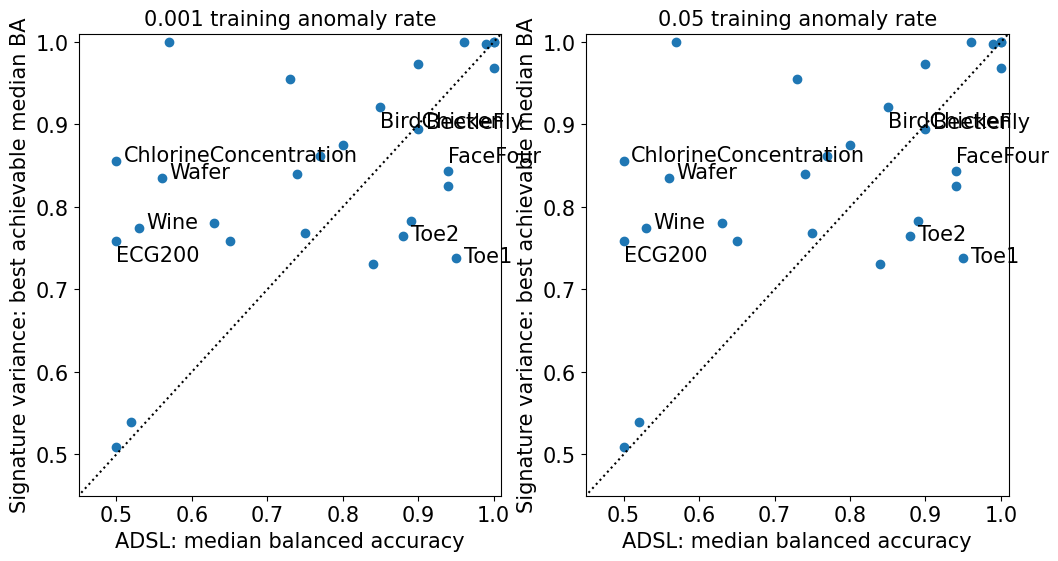

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
comparison_table_1 = UCR_data_support.plot_ucr_result(
    roughpathsbest, roughpathserror, anomaly_level=0.001, ax_num=0, axs=axs
)
comparison_table_2 = UCR_data_support.plot_ucr_result(
    roughpathsbest, roughpathserror, anomaly_level=0.05, ax_num=1, axs=axs
)
fig.savefig("benchmark.pdf")
plt.show()

In [41]:
comparison_table_1

,0,1,2,3,4
0,Adiac,0.998026,0.064889,0.99,0.1
1,ArrowHead,0.758741,0.06979,0.65,0.03
2,Beef,1.0,0.0,0.57,0.15
3,BeetleFly,0.894737,0.160296,0.9,0.08
4,BirdChicken,0.921053,0.143551,0.85,0.15
5,CBF,0.875265,0.01985,0.8,0.04
6,ChlorineConcentration,0.855262,0.01644,0.5,0.0
7,Coffee,0.730769,0.097301,0.84,0.04
8,ECG200,0.759014,0.062465,0.5,0.03
9,ECGFiveDays,0.824828,0.024429,0.94,0.11


In [42]:
comparison_table_2

,0,1,2,3,4
0,Adiac,0.998026,0.064889,0.99,0.1
1,ArrowHead,0.758741,0.06979,0.65,0.03
2,Beef,1.0,0.0,0.57,0.15
3,BeetleFly,0.894737,0.160296,0.9,0.08
4,BirdChicken,0.921053,0.143551,0.85,0.15
5,CBF,0.875265,0.01985,0.8,0.04
6,ChlorineConcentration,0.855262,0.01644,0.5,0.0
7,Coffee,0.730769,0.097301,0.84,0.04
8,ECG200,0.759014,0.062465,0.5,0.03
9,ECGFiveDays,0.824828,0.024429,0.94,0.11


### Language dataset example

In [50]:
data.load_language_data()

In [51]:
random.seed(1)
data.corpus = random.sample(list(data.corpus), 800)
data.test_inlier = random.sample(list(data.test_inlier), 10)
data.test_outlier = random.sample(list(data.test_outlier), 10)

##### Takes a while as signature dimension very large

In [52]:
%%time

depth = 2
signature_maha_knn = SignatureMahalanobisKNN(random_state=seed)
# Measure the time spent on fit
start_time = time.time()
signature_maha_knn.fit(
    knn_library="pynndescent",
    X_train=data.corpus,
    signature_kwargs={
        "augmentation_list": None,
        "depth": depth,
        "backend": "iisignature",
    },
)
fit_time = time.time() - start_time
print(f"fit_time: {fit_time}")

# Measure the time spent on conformance
start_time = time.time()
inlier_dists = signature_maha_knn.conformance(
    data.test_inlier, n_neighbors=n_neighbours
)
outlier_dists = signature_maha_knn.conformance(
    data.test_outlier, n_neighbors=n_neighbours
)
compute_auc_time = time.time() - start_time
print(f"compute_auc_time: {compute_auc_time}")

auc = compute_auc_given_dists(
    all_inlier_dists,
    all_outlier_dists,
    plot=True,
    title=f"Language One-Hot (depth={depth})",
)
print("Overall, ", "depth: ", depth, "AUC: ", auc)

RuntimeError: Legitimate width 2 <-> 256 exceeded